# Projet IA
## Vérification de la véracité des informations concernant COVID19. 

### Importation des dépendances 

In [1]:
import numpy as np
import pandas as pd
# Visualisation
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
# Natural Language Toolkit
from nltk.stem import WordNetLemmatizer

from tqdm import tqdm, tqdm_notebook # show progress bar

In [2]:
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
# importation du dataset
df = pd.read_excel("Data-FakeRealCOVID.xlsx", header=0)

## Exploration du Dataset

In [4]:
df.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [5]:
df.columns

Index(['id', 'tweet', 'label'], dtype='object')

In [6]:
print("lenght : ",len(df))
print("size :",df.size)
print("shape : ",df.shape)

lenght :  6420
size : 19260
shape :  (6420, 3)


In [7]:
df.info(verbose  = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Columns: 3 entries, id to label
dtypes: int64(1), object(2)
memory usage: 150.6+ KB


In [8]:
df.dtypes

id        int64
tweet    object
label    object
dtype: object

In [9]:
#Vérification des données manquantes
df.columns[df.isnull().any()]

Index([], dtype='object')

On a pas de données manquantes

In [10]:
# voir les valeurs possible de la collone label
df['label'].unique()

array(['real', 'fake'], dtype=object)

In [11]:
df['label'].nunique()


2

In [12]:
output_notebook()

Loading BokehJS ...

In [13]:
# Visualisation 

label = df.groupby('label').count()
idx = label.index.tolist()
values= label['tweet'].tolist()

In [14]:
p = figure(x_range=idx, title="Distribution of data",
           toolbar_location=None, tools="")

p.vbar(x=idx, top=values, width=0.9)

p.xgrid.grid_line_color = None


show(p)

## Prétraitement des données

In [15]:
data=df[['tweet','label']]


In [16]:
data['label'] = data['label'].replace('real',1)
data['label'] = data['label'].replace('fake',0)


<ipython-input-16-d4816ad4ea26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].replace('real',1)
<ipython-input-16-d4816ad4ea26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].replace('fake',0)


In [17]:
data['label'].unique()

array([1, 0], dtype=int64)

In [18]:
data_real = data[data['label'] == 1]
data_fake = data[data['label'] == 0]
dataset = pd.concat([data_real, data_fake])

In [19]:
len(data_real)

3360

In [20]:
dataset['tweetsave']=dataset['tweet']

In [21]:
# Fonctions pour nettoyage des données
import re

## supprimer les emojis 
def deEmojify(text):
    return text.encode("ascii", "ignore").decode()
## séparer les hashtags en des mots 
def clean_hash(text):
    s = ""
    for word in str(text).split():
        if word.startswith("#"):
            word=  " ".join([a for a in re.split('([A-Z][a-z]+)', word) if a])
        s+= word+' '
    return s
## supprimer les mentions 
def remove_mentions(text):
    return re.sub("@[A-Za-z0-9_]+","", text)
## supprimer les urls 
def clean_url(text):
    return re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)
## supprimer la ponctuation 
import string
punctuations = string.punctuation
def clean_punctuation(text):
    trs = str.maketrans('', '', punctuations)
    return text.translate(trs)
## supprimer les nombres 
def clean_numbers(text):
    return re.sub('[0-9]+', '', text)

In [22]:
## supprimer les stop words 
# géneration de la liste des "mots vide"(stopwords) avec nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords= stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\botai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
print(*stopwords)

i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't weren weren't won won't wouldn wouldn't


In [24]:
STOPWORDS= set(stopwords)

In [25]:
## supprimer les stopwords 
def clean_stopword(text):
    s = ""
    for word in str(text).split():
        if word not in STOPWORDS:
             s+=word+" "
    return s

In [26]:
def clean_shortwords(text):
    s=""
    for word in str(text).split():
        if len(word) > 1:
            s+=word+" "
    return s

In [27]:
dataset['tweet'] = dataset['tweet'].apply(lambda text: deEmojify(text))
dataset['tweet'] = dataset['tweet'].apply(lambda text: clean_hash(text))
dataset['tweet'] = dataset['tweet'].apply(lambda text: remove_mentions(text))
dataset['tweet'] = dataset['tweet'].apply(lambda text: clean_url(text))
dataset['tweet'] = dataset['tweet'].str.lower()
dataset['tweet'] = dataset['tweet'].apply(lambda text: clean_stopword(text))
dataset['tweet'] = dataset['tweet'].apply(lambda text: clean_punctuation(text))
dataset['tweet'] = dataset['tweet'].apply(lambda text: clean_numbers(text))
dataset['tweet'] = dataset['tweet'].apply(lambda text: clean_shortwords(text))
dataset


,tweet,label,tweetsave
0,cdc currently reports deaths general discrepan...,1,The CDC currently reports 99031 deaths. In gen...
1,states reported deaths small rise last tuesday...,1,States reported 1121 deaths a small rise from ...
3,india fights corona covid testing laboratories...,1,#IndiaFightsCorona: We have 1524 #COVID testin...
4,populous states generate large case counts loo...,1,Populous states can generate large case counts...
5,covid act found on average person illinois cov...,1,"Covid Act Now found ""on average each person in..."
...,...,...,...
6413,states like new york illinois california vocal...,0,States like New York Illinois and California h...
6415,tiger tested positive covid please stay away p...,0,A tiger tested positive for COVID-19 please st...
6416,autopsies prove covid is blood clot pneumonia ...,0,???Autopsies prove that COVID-19 is??� a blood...
6417,post claims covid vaccine already developed ca...,0,_A post claims a COVID-19 vaccine has already ...


### Tokenisation des tweets avec NLTK

In [28]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\botai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\botai\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
from nltk.tokenize import word_tokenize
dataset['tweet_tokenized'] = dataset['tweet'].apply(nltk.word_tokenize)
dataset['tweet_tokenized'].head()

0    [cdc, currently, reports, deaths, general, dis...
1    [states, reported, deaths, small, rise, last, ...
3    [india, fights, corona, covid, testing, labora...
4    [populous, states, generate, large, case, coun...
5    [covid, act, found, on, average, person, illin...
Name: tweet_tokenized, dtype: object

## Stemming avec nltk
 processus de réduction d'un mot à un ou plusieurs racines.

In [30]:
text = dataset['tweet_tokenized'][6]
print(text)


['tested', 'positive', 'covid', 'symptoms', 'stay', 'home', 'away', 'people', 'learn', 'cdcs', 'recommendations', 'around', 'others', 'covid', 'infection']


In [31]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def stemming(token):
    l=[]
    for e in token:
        l.append(ps.stem(e))
    return l
dataset['tweet_tokenized']= dataset['tweet_tokenized'].apply(lambda t: stemming(t))
dataset['tweet_tokenized'].head()

0    [cdc, current, report, death, gener, discrep, ...
1    [state, report, death, small, rise, last, tues...
3    [india, fight, corona, covid, test, laboratori...
4    [popul, state, gener, larg, case, count, look,...
5    [covid, act, found, on, averag, person, illino...
Name: tweet_tokenized, dtype: object

## Lemmatization avec NLTK
processus consistant à regrouper les différentes formes infléchies d'un mot afin qu'elles puissent être analysées comme un seul élément

In [32]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()

def lemmatizing(token):
    l=[]
    for e in token:
        l.append(lm.lemmatize(e))
    return l
dataset['tweet_tokenized'] = dataset['tweet_tokenized'].apply(lambda t: lemmatizing(t))
dataset['tweet_tokenized'].head()

0    [cdc, current, report, death, gener, discrep, ...
1    [state, report, death, small, rise, last, tues...
3    [india, fight, corona, covid, test, laboratori...
4    [popul, state, gener, larg, case, count, look,...
5    [covid, act, found, on, averag, person, illino...
Name: tweet_tokenized, dtype: object

In [33]:

dataset['tweet']= [' '.join(map(str, l)) for l in dataset['tweet_tokenized']]


In [34]:
dataset.head()

,tweet,label,tweetsave,tweet_tokenized
0,cdc current report death gener discrep death c...,1,The CDC currently reports 99031 deaths. In gen...,"[cdc, current, report, death, gener, discrep, ..."
1,state report death small rise last tuesday sou...,1,States reported 1121 deaths a small rise from ...,"[state, report, death, small, rise, last, tues..."
3,india fight corona covid test laboratori india...,1,#IndiaFightsCorona: We have 1524 #COVID testin...,"[india, fight, corona, covid, test, laboratori..."
4,popul state gener larg case count look new cas...,1,Populous states can generate large case counts...,"[popul, state, gener, larg, case, count, look,..."
5,covid act found on averag person illinoi covid...,1,"Covid Act Now found ""on average each person in...","[covid, act, found, on, averag, person, illino..."


In [35]:
storedDf= dataset[['tweet','label']]
storedDf.head()

,tweet,label
0,cdc current report death gener discrep death c...,1
1,state report death small rise last tuesday sou...,1
3,india fight corona covid test laboratori india...,1
4,popul state gener larg case count look new cas...,1
5,covid act found on averag person illinoi covid...,1


In [36]:
storedDf.to_csv("dataCleaned.csv",index=False,header=True)


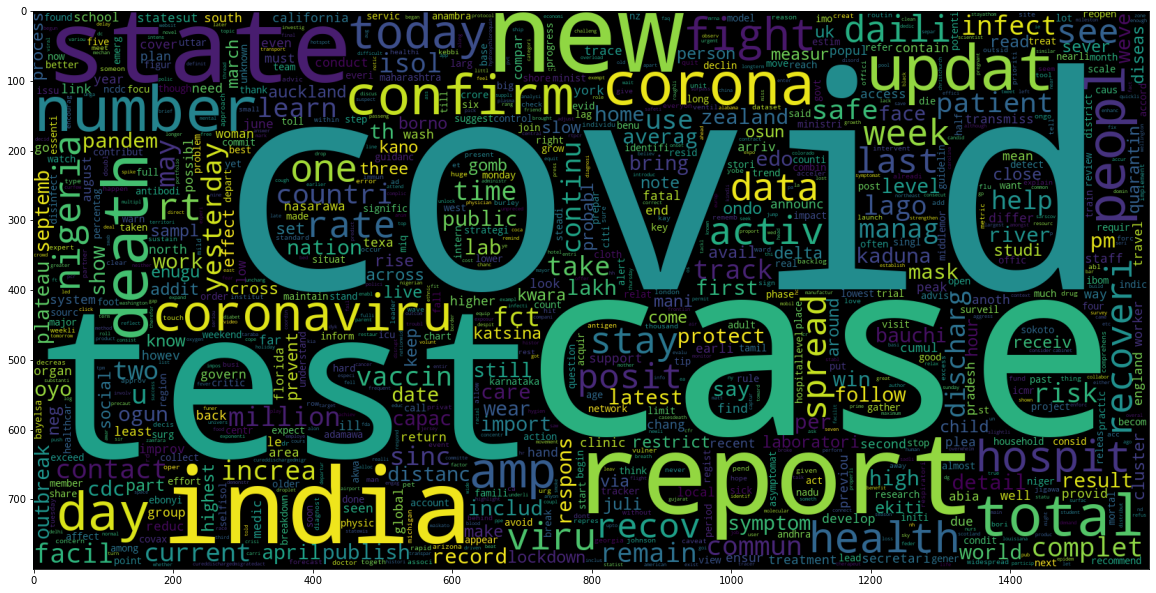

In [37]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(dataset[:3360].tweet))
plt.imshow(wc)

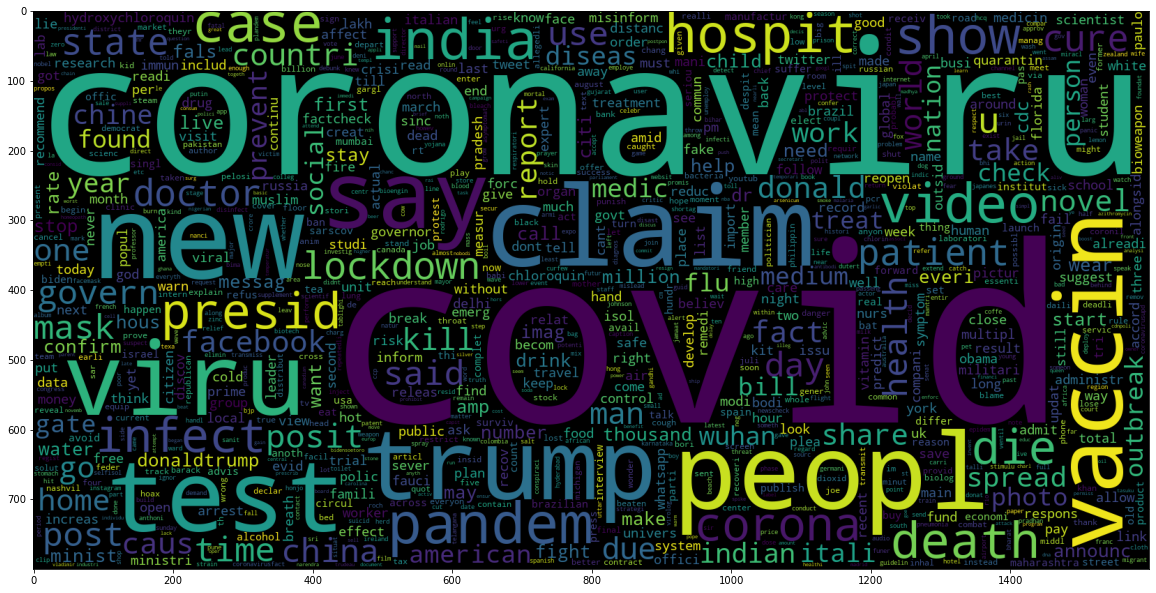

In [38]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(dataset[3360:].tweet))
plt.imshow(wc)

## Méthode Bag of words:

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
target=pd.DataFrame()
target['tweet'] = dataset['tweet_tokenized'].apply(lambda x: " ".join(x))


In [40]:
coun_vect = CountVectorizer(min_df=2)

In [41]:
count_matrix = coun_vect.fit_transform(target.tweet)
count_array = count_matrix.toarray()
matrice = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())
matrice.to_csv("matrice.csv",index=True,header=True)
matrice.head()

,aaj,aamir,aamp,ababa,abandon,abbott,abia,abil,abl,ableg,...,zee,zero,zika,zinc,zithromax,zombi,zone,zoo,zookeep,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
bow_vectors=matrice.values.tolist()

In [43]:
dataset['bow_vectors']=bow_vectors

In [44]:
dataset.head()

,tweet,label,tweetsave,tweet_tokenized,bow_vectors
0,cdc current report death gener discrep death c...,1,The CDC currently reports 99031 deaths. In gen...,"[cdc, current, report, death, gener, discrep, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,state report death small rise last tuesday sou...,1,States reported 1121 deaths a small rise from ...,"[state, report, death, small, rise, last, tues...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,india fight corona covid test laboratori india...,1,#IndiaFightsCorona: We have 1524 #COVID testin...,"[india, fight, corona, covid, test, laboratori...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,popul state gener larg case count look new cas...,1,Populous states can generate large case counts...,"[popul, state, gener, larg, case, count, look,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
5,covid act found on averag person illinoi covid...,1,"Covid Act Now found ""on average each person in...","[covid, act, found, on, averag, person, illino...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [45]:
vocab_size=len(coun_vect.vocabulary_)
vocab_size

4507

In [46]:
vocab = list(coun_vect.vocabulary_.keys())
vocab

['cdc',
 'current',
 'report',
 'death',
 'gener',
 'discrep',
 'count',
 'differ',
 'sourc',
 'small',
 'toll',
 'stand',
 'roughli',
 'peopl',
 'today',
 'state',
 'rise',
 'last',
 'tuesday',
 'southern',
 'india',
 'fight',
 'corona',
 'covid',
 'test',
 'laboratori',
 'th',
 'august',
 'done',
 'dg',
 'stay',
 'safe',
 'win',
 'popul',
 'larg',
 'case',
 'look',
 'new',
 'per',
 'million',
 'smaller',
 'show',
 'california',
 'texa',
 'al',
 'ar',
 'id',
 'ky',
 'la',
 'nv',
 'sc',
 'act',
 'found',
 'on',
 'averag',
 'person',
 'illinoi',
 'infect',
 'data',
 'growth',
 'rate',
 'declin',
 'time',
 'factor',
 'stayathom',
 'order',
 'restrict',
 'put',
 'place',
 'posit',
 'symptom',
 'home',
 'away',
 'learn',
 'recommend',
 'around',
 'other',
 'take',
 'simpl',
 'daili',
 'precaut',
 'help',
 'prevent',
 'spread',
 'respiratori',
 'ill',
 'like',
 'protect',
 'coronaviru',
 'announc',
 'first',
 'particip',
 'age',
 'dose',
 'phase',
 'studi',
 'mrna',
 'vaccin',
 'novel',
 'r

In [47]:
from sklearn.model_selection import train_test_split


In [48]:
dataTrain, data_remaining, labelsTrain, label_remaining = train_test_split(dataset.bow_vectors,dataset.label,train_size=0.8)

In [49]:
dataValid, dataTest, labelsValid, labelsTest = train_test_split(data_remaining, 
                                                                         label_remaining , 
                                                                         test_size=0.5)

In [50]:
print(dataTrain.shape,labelsTrain.shape)
print(dataValid.shape,labelsValid.shape)
print(dataTest.shape,labelsTest.shape)

(5136,) (5136,)
(642,) (642,)
(642,) (642,)


## NN

In [51]:
# PyTorch modules
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.optim.lr_scheduler import CosineAnnealingLR
from torch.utils.data import Dataset, DataLoader
from torch.utils.data.dataset import random_split

In [52]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [53]:
class MyDataset(Dataset):
    def __init__(self, data,label):
       
        self.bow = data.tolist()
        self.targets = label.tolist()
    def __getitem__(self, i):
        return (
            self.bow[i],
            self.targets[i]
        )
    
    def __len__(self):
        return len(self.targets)

In [54]:
train = MyDataset(dataTrain,labelsTrain)
test = MyDataset(dataTest,labelsTest)
valid = MyDataset(dataValid,labelsValid)

In [55]:
BATCH_SIZE=32
def collate(batch):
    bow = [item[0] for item in batch]
    target = torch.LongTensor([item[1] for item in batch])
    return  bow, target

trainDL = DataLoader(train,batch_size=BATCH_SIZE,shuffle = True,collate_fn=collate)
testDL = DataLoader(test,batch_size=BATCH_SIZE,shuffle = False,collate_fn=collate)
validDL = DataLoader(valid,batch_size=BATCH_SIZE,shuffle = False,collate_fn=collate)

In [56]:
len(trainDL)


161

In [57]:
class FeedfowardTextClassifier(nn.Module):
    def __init__(self, device, vocab_size, hidden1, hidden2, num_labels, batch_size):
        super(FeedfowardTextClassifier, self).__init__()
        self.device = device
        self.batch_size = batch_size
        self.fc1 = nn.Linear(vocab_size, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, num_labels)
    
    def forward(self, x):
        batch_size = len(x)
        if batch_size != self.batch_size:
            self.batch_size = batch_size
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return torch.sigmoid(self.fc3(x))

In [58]:
# Define hidden layer size
HIDDEN1 = 100 #@param [10, 30, 50, 100, 200, 500] {allow-input: true}
HIDDEN2 = 50 #@param [10, 30, 50, 100, 200, 500] {allow-input: true}

In [59]:
bow_model = FeedfowardTextClassifier(
    vocab_size= vocab_size,
    hidden1=HIDDEN1,
    hidden2=HIDDEN2,
    num_labels=2,
    device=device,
    batch_size=BATCH_SIZE,
)
bow_model

FeedfowardTextClassifier(
  (fc1): Linear(in_features=4507, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=2, bias=True)
)

# Train

In [60]:
LEARNING_RATE = 0.001

In [61]:
criterion = nn.CrossEntropyLoss()
optimizer= optim.Adam(bow_model.parameters(),lr=LEARNING_RATE)

scheduler = CosineAnnealingLR(optimizer, 1)

In [62]:
def train_epoch(model, optimizer, train_loader):
        model.train()
        total_loss, total = 0, 0
        for dt in trainDL:
            inputs,target = dt
            # Reset gradient
            optimizer.zero_grad()
            output = model(torch.Tensor(inputs))
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            scheduler.step()
            total_loss += loss.item()
            total += len(target)
        return total_loss / total
        
    

def validate_epoch(model, valid_loader, input_type='bow'):
    model.eval()
    total_loss, total = 0, 0
    with torch.no_grad():
        for dt in trainDL:
            inputs,target = dt

            # Forward pass
            output = model(torch.Tensor(inputs))

            # Calculate how wrong the model is
            loss = criterion(output, target)

            # Record metrics
            total_loss += loss.item()
            total += len(target)

    return total_loss / total

In [63]:
n_epochs = 0
train_losses, valid_losses = [], []
while True:
    train_loss = train_epoch(bow_model, optimizer, trainDL)
    valid_loss = validate_epoch(bow_model, validDL)
    
    tqdm.write(
        f'epoch #{n_epochs + 1:3d}\ttrain_loss: {train_loss:.2e}\tvalid_loss: {valid_loss:.2e}\n',
    )
    
    # Early stopping if the current valid_loss is greater than the last three valid losses
    if len(valid_losses) > 2 and all(valid_loss >= loss for loss in valid_losses[-3:]):
        print('Stopping early')
        break
    
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    n_epochs += 1

epoch #  1	train_loss: 1.74e-02	valid_loss: 1.25e-02

epoch #  2	train_loss: 1.20e-02	valid_loss: 1.10e-02

epoch #  3	train_loss: 1.09e-02	valid_loss: 1.05e-02

epoch #  4	train_loss: 1.05e-02	valid_loss: 1.03e-02

epoch #  5	train_loss: 1.03e-02	valid_loss: 1.02e-02

epoch #  6	train_loss: 1.02e-02	valid_loss: 1.01e-02

epoch #  7	train_loss: 1.01e-02	valid_loss: 1.00e-02

epoch #  8	train_loss: 1.00e-02	valid_loss: 1.00e-02

epoch #  9	train_loss: 1.00e-02	valid_loss: 1.00e-02

epoch # 10	train_loss: 1.00e-02	valid_loss: 9.99e-03

epoch # 11	train_loss: 9.99e-03	valid_loss: 9.98e-03

epoch # 12	train_loss: 9.98e-03	valid_loss: 9.98e-03

epoch # 13	train_loss: 9.98e-03	valid_loss: 9.98e-03

epoch # 14	train_loss: 9.98e-03	valid_loss: 9.97e-03

epoch # 15	train_loss: 9.97e-03	valid_loss: 9.98e-03

epoch # 16	train_loss: 9.98e-03	valid_loss: 9.97e-03

epoch # 17	train_loss: 9.97e-03	valid_loss: 9.97e-03

epoch # 18	train_loss: 9.97e-03	valid_loss: 9.96e-03

epoch # 19	train_loss: 9.96e

# test 

In [64]:
test_loss = 0
correct = 0

with torch.no_grad():
    
    for dt in validDL:
        inputs,target = dt
        
        output = bow_model(torch.Tensor(inputs))
        
        loss = criterion(output, target)
        test_loss += loss.item()
        
        correct += torch.sum(torch.argmax(output, dim=1) == target).item()

        
        

    test_loss /= len(testDL)
    correct /= len(testDL.dataset) #10.000  

print(f"Accuracy {correct*100:.2f}%")
        

Accuracy 90.03%


# exemple de prediction

In [144]:
import random
l = list()
from IPython.core.display import display, HTML
def print_random_prediction(Testdataset,model, n=5):
    to_value = lambda x: 'True' if x else 'False'
    model.eval()
    rows = []
    for i in range(n):
        with torch.no_grad():
            random_idx = random.randint(0,len(Testdataset)-1)
            text, target, bow =Testdataset.iloc[int(random_idx)]            
            inputs = bow
            l=bow
            probs = model(torch.Tensor(inputs))
            probs = probs.detach().cpu().numpy()
            prediction = np.argmax(probs)
            print(probs)
            predicted = to_value(prediction)
            actual = to_value(target)
            
            row = f"""
            <tr>
            <td>{i+1}&nbsp;</td>
            <td>{text}&nbsp;</td>
            <td>{predicted}&nbsp;</td>
            <td>{actual}&nbsp;</td>
            </tr>
            """
            rows.append(row)
    
    rows_joined = '\n'.join(rows)
    table = f"""
    <table>
    <tbody>
    <tr>
    <td><b>Tweet</b>&nbsp;</td>
    <td><b>Predicted</b>&nbsp;</td>
    <td><b>Actual</b>&nbsp;</td>
    </tr>{rows_joined}
    </tbody>
    </table>
    """
    display(HTML(table))

In [145]:
Testdataset=dataset[['tweetsave','label','bow_vectors']].sample(100)
print_random_prediction(Testdataset,bow_model, n=5)

[4.108454e-17 1.000000e+00]
[9.535669e-11 1.000000e+00]
[1.0000000e+00 1.8723226e-12]
[9.9999976e-01 1.6320965e-07]
[9.9999964e-01 2.3482987e-07]


# Déploiement du modele

In [148]:
def cleantweet(text):
    text = deEmojify(text)
    text = clean_hash(text)
    text = remove_mentions(text)
    text =  clean_url(text)
    text = text.lower()
    text = clean_stopword(text)
    text = clean_punctuation(text)
    text = clean_numbers(text)
    text = stemming(text)
    text = lemmatizing(text)
    return ''.join(map(str, text)) 


def vectorizetweet(text,vocab):
    d = dict()
    for word in vocab:
        d[word]=0
    for word in str(text).split():
        if word  in vocab:
            d[word]+=1
    return list(d.values())


def makeprediction(tweet_vector,model):
    model.eval()
    with torch.no_grad():
            probs = model(torch.Tensor(tweet_vector))
            probs = probs.detach().cpu().numpy()
            prediction = np.argmax(probs)
            print(probs)
            print(prediction)
    return

In [150]:
text = "Fruit Vendor Spitting To Spread Coronavirus Goes Viral"
tweet = cleantweet(text)
l2=vectorizetweet(tweet,vocab)
print(l==l2)
makeprediction(l2,bow_model)


False
[9.9992776e-01 5.4078391e-05]
0


5